In [91]:
import pandas as pd
import numpy as np

In [92]:
df_pedido = pd.read_csv('./base/pedido.csv')
df_pedido.head()

,id_pedido,id_cliente,status_pedido,dt_compra_pedido,dt_pedido_aprovado,dt_transportadora_pedido_entregue,dt_entregue_cliente,dt_entrega_estimada_pedido
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [93]:
df_pagto = pd.read_csv('./base/pagamento.csv')

df_pagto.head()

,id_pedido,sequencial_pagamento,tp_pagamento,qtd_parcelas,vl_pagamento
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [94]:
df_geral = pd.merge(
    df_pedido
    , df_pagto
    , how = 'inner'
    , on = 'id_pedido'
)

df_geral.head()

,id_pedido,id_cliente,status_pedido,dt_compra_pedido,dt_pedido_aprovado,dt_transportadora_pedido_entregue,dt_entregue_cliente,dt_entrega_estimada_pedido,sequencial_pagamento,tp_pagamento,qtd_parcelas,vl_pagamento
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


## PIVOT TABLE
***

``` pd.pivot_table() ```

In [105]:
pd.pivot_table(
    data = df_geral
    , index = ['status_pedido']
    , columns = ['tp_pagamento']
    , values = ['vl_pagamento']
    , aggfunc = [np.sum]
)

sum                                                
              vl_pagamento                                                
tp_pagamento        boleto   credit_card debit_card not_defined    voucher
status_pedido                                                             
approved               NaN  2.410800e+02        NaN         NaN        NaN
canceled          17504.10  9.737531e+04    2711.27         0.0   25664.92
created             175.44  5.126600e+02        NaN         NaN        NaN
delivered       2769932.58  1.210109e+07  208421.12         NaN  343013.19
invoiced          15330.82  5.109413e+04     986.04         NaN    1727.00
processing        17135.76  5.090401e+04     349.79         NaN    1004.55
shipped           24227.70  1.461958e+05    2660.80         NaN    4129.66
unavailable       25054.87  9.466632e+04    2860.77         NaN    3897.55

In [97]:
df_tp_status = pd.pivot_table(
    data = df_geral
    , index = ['status_pedido']
    , columns = ['tp_pagamento']
    , values = ['vl_pagamento']
    , aggfunc = [np.sum]
).round(2).reset_index()

In [98]:
df_tp_status.head()

status_pedido          sum                                      \
                           vl_pagamento                                       
tp_pagamento                     boleto  credit_card debit_card not_defined   
0                 approved          NaN       241.08        NaN         NaN   
1                 canceled     17504.10     97375.31    2711.27         0.0   
2                  created       175.44       512.66        NaN         NaN   
3                delivered   2769932.58  12101094.88  208421.12         NaN   
4                 invoiced     15330.82     51094.13     986.04         NaN   

                         
                         
tp_pagamento    voucher  
0                   NaN  
1              25664.92  
2                   NaN  
3             343013.19  
4               1727.00

In [99]:
df_tp_status.columns

MultiIndex([('status_pedido',             '',            ''),
            (          'sum', 'vl_pagamento',      'boleto'),
            (          'sum', 'vl_pagamento', 'credit_card'),
            (          'sum', 'vl_pagamento',  'debit_card'),
            (          'sum', 'vl_pagamento', 'not_defined'),
            (          'sum', 'vl_pagamento',     'voucher')],
           names=[None, None, 'tp_pagamento'])

In [100]:
for x in df_tp_status.columns:
    print(x)

('status_pedido', '', '')
('sum', 'vl_pagamento', 'boleto')
('sum', 'vl_pagamento', 'credit_card')
('sum', 'vl_pagamento', 'debit_card')
('sum', 'vl_pagamento', 'not_defined')
('sum', 'vl_pagamento', 'voucher')


In [101]:
for x in df_tp_status.columns:
    if x[0] == 'status_pedido':
        print(x[0])
    else:
        print(x[2])

status_pedido
boleto
credit_card
debit_card
not_defined
voucher


In [102]:
nm_colunas = []
for x in df_tp_status.columns:
    if x[0] == 'status_pedido':
        nm_colunas.append(x[0])
    else:
        nm_colunas.append(x[2])
print(nm_colunas)

['status_pedido', 'boleto', 'credit_card', 'debit_card', 'not_defined', 'voucher']


In [103]:
df_tp_status.columns = nm_colunas
df_tp_status.head()

,status_pedido,boleto,credit_card,debit_card,not_defined,voucher
0,approved,NaN,241.08,NaN,NaN,NaN
1,canceled,17504.10,97375.31,2711.27,0.0,25664.92
2,created,175.44,512.66,NaN,NaN,NaN
3,delivered,2769932.58,12101094.88,208421.12,NaN,343013.19
4,invoiced,15330.82,51094.13,986.04,NaN,1727.00


## GROUP BY
***

``` df.groupby ```

In [106]:
df_geral.head()

,id_pedido,id_cliente,status_pedido,dt_compra_pedido,dt_pedido_aprovado,dt_transportadora_pedido_entregue,dt_entregue_cliente,dt_entrega_estimada_pedido,sequencial_pagamento,tp_pagamento,qtd_parcelas,vl_pagamento
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [110]:
df_geral.groupby(['tp_pagamento', 'status_pedido']).agg({'vl_pagamento': np.sum})

vl_pagamento
tp_pagamento status_pedido              
boleto       canceled       1.750410e+04
             created        1.754400e+02
             delivered      2.769933e+06
             invoiced       1.533082e+04
             processing     1.713576e+04
             shipped        2.422770e+04
             unavailable    2.505487e+04
credit_card  approved       2.410800e+02
             canceled       9.737531e+04
             created        5.126600e+02
             delivered      1.210109e+07
             invoiced       5.109413e+04
             processing     5.090401e+04
             shipped        1.461958e+05
             unavailable    9.466632e+04
debit_card   canceled       2.711270e+03
             delivered      2.084211e+05
             invoiced       9.860400e+02
             processing     3.497900e+02
             shipped        2.660800e+03
             unavailable    2.860770e+03
not_defined  canceled       0.000000e+00
voucher      canceled       2.566492e+04
             delivered      3.430132e+05
             invoiced       1.727000e+03
             processing     1.004550e+03
             shipped        4.129660e+03
             unavailable    3.897550e+03

In [111]:
df_geral.groupby(['tp_pagamento', 'status_pedido']).agg(
    {
        'vl_pagamento': np.sum
        , 'id_pedido': 'nunique'
    }
)

vl_pagamento  id_pedido
tp_pagamento status_pedido                         
boleto       canceled       1.750410e+04         95
             created        1.754400e+02          2
             delivered      2.769933e+06      19191
             invoiced       1.533082e+04         67
             processing     1.713576e+04         70
             shipped        2.422770e+04        209
             unavailable    2.505487e+04        150
credit_card  approved       2.410800e+02          2
             canceled       9.737531e+04        444
             created        5.126600e+02          3
             delivered      1.210109e+07      74304
             invoiced       5.109413e+04        239
             processing     5.090401e+04        222
             shipped        1.461958e+05        848
             unavailable    9.466632e+04        443
debit_card   canceled       2.711270e+03          7
             delivered      2.084211e+05       1485
             invoiced       9.860400e+02          6
             processing     3.497900e+02          2
             shipped        2.660800e+03         22
             unavailable    2.860770e+03          6
not_defined  canceled       0.000000e+00          3
voucher      canceled       2.566492e+04         94
             delivered      3.430132e+05       3679
             invoiced       1.727000e+03         11
             processing     1.004550e+03         11
             shipped        4.129660e+03         44
             unavailable    3.897550e+03         27

In [113]:
df_grupo = df_geral.groupby(['tp_pagamento', 'status_pedido']).agg(
    {
        'vl_pagamento': np.sum
        , 'id_pedido': 'nunique'
    }
).round(2).reset_index()

In [114]:
df_grupo.head()

,tp_pagamento,status_pedido,vl_pagamento,id_pedido
0,boleto,canceled,17504.10,95
1,boleto,created,175.44,2
2,boleto,delivered,2769932.58,19191
3,boleto,invoiced,15330.82,67
4,boleto,processing,17135.76,70


## EXEMPLO REAL DO GROUP BY E PIVOT TABLE
***

__VAMOS CRIAR UM HEAT MAP POR ANO E MÊS POR VALOR DE PAGAMENTO__

In [115]:
df_geral['ano_compra'] = pd.to_datetime(df_geral['dt_compra_pedido']).dt.year.astype(int)

In [116]:
df_geral['mes_compra'] = pd.to_datetime(df_geral['dt_compra_pedido']).dt.month.astype(int)

In [118]:
df_grupo =  df_geral.groupby(['ano_compra', 'mes_compra']).agg({'vl_pagamento': np.sum}).round(2).reset_index()

In [120]:
df_grupo = pd.pivot_table( 
    df_grupo
    , index = 'mes_compra'
    , columns = 'ano_compra'
    , values = 'vl_pagamento'
)

In [121]:
import seaborn as sns

<AxesSubplot:xlabel='ano_compra', ylabel='mes_compra'>

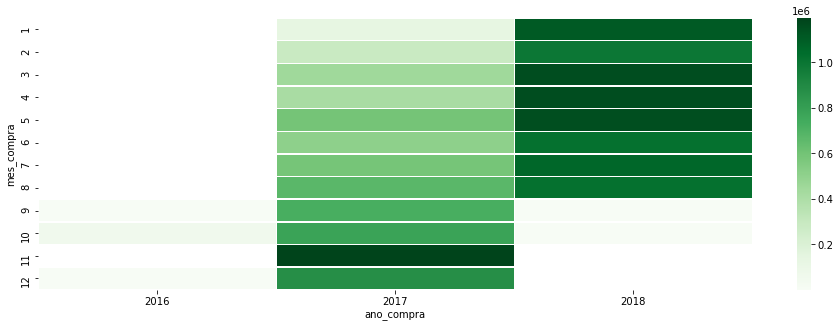

In [122]:
ax = sns.heatmap(df_grupo, linewidths=.5, cmap="Greens")
ax.figure.set_size_inches(16,5)
ax